In [1]:
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pickle
import os 
import sys
import numpy as np 
from matplotlib.colors import ListedColormap, BoundaryNorm
sys.path.append(os.path.dirname(os.path.abspath('')))
from afpo import AFPO
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd 

/gpfs1/home/p/w/pwelch1/inflatable_particles/logic_gates/afpo.py:21: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/users/p/w/pwelch1/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/users/p/w/pwelch1/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/users/p/w/pwelch1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/users/p/w/pwelch1/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/users/p/w/pwelch1/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py

In [2]:
positions_x = []  # X-coordinates
positions_y = []  # Y-coordinates

hex_radius = 1
hex_height = np.sqrt(3) * hex_radius  # Height of the hexagon (vertical spacing)
values = [[1]*3, [1]*4, [1]*3]

for row_idx, row in enumerate(values):
    for col_idx, value in enumerate(row):
        # Offset every second row to create the hexagonal pattern
        x_pos = (col_idx - 0.5 * (row_idx % 2))*0.22
        y_pos = (-row_idx * hex_height)*0.1
        positions_x.append(x_pos)
        positions_y.append(y_pos)

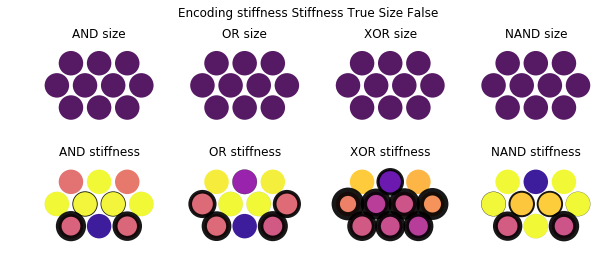

In [3]:
seeds = 30
gen = 100
fig, axs = plt.subplots(2, 4, figsize=(10, 4))
axs = axs.flatten()
offset = 0 
encoding = "stiffness"
size = False
stiffness = True
# plot_type = "std"
for color_coding in ['size', 'stiffness']:
    for idx, gate in enumerate(["AND", "OR", "XOR", "NAND"]):

        stiffness_by_particle = {}
        size_by_particle = {}
        for particle in range(10):
            stiffness_by_particle[particle] = []
            size_by_particle[particle] = []

        for seed in range(seeds):
            checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
            with open(checkpoint_file, 'rb') as f:
                afpo, rng_state, np_rng_state = pickle.load(f)
            best_mat = afpo.return_best()
            for p_idx, particle in enumerate(best_mat.particles):
                stiffness_by_particle[p_idx].append(particle.stiffness)
                size_by_particle[p_idx].append(particle.expansion)


        std_size_by_particle = [np.std(x) for x in size_by_particle.values()]
        std_stiffness_by_particle = [np.std(x) for x in stiffness_by_particle.values()]
        mean_size_by_particle = [sum(x)/len(x) for x in size_by_particle.values()]
        mean_stiffness_by_particle = [sum(x)/len(x) for x in stiffness_by_particle.values()]

        norm = mpl.colors.Normalize(vmin=0, vmax=0.04) if color_coding == "size" else mpl.colors.Normalize(vmin=0, vmax=10)

        colors = mean_size_by_particle  if color_coding=="size" else mean_stiffness_by_particle   
        cmap = 'viridis'  if color_coding=="size" else 'plasma'


        if color_coding == 'stiffness': linewidths=list(np.array(std_stiffness_by_particle)*2);edgecolors='black'
        if color_coding == 'size': linewidths=list(np.array(std_size_by_particle)*400);edgecolors='grey'

        # print(max(np.array(mean_size_by_particle)), 'size')
        # print(max(np.array(mean_stiffness_by_particle)), 'stiffness')
        linewidths[0] = 0.0
        linewidths[2] = 0.0
        scatter = axs[idx+offset].scatter(positions_x, positions_y, s=600, \
            c=colors, cmap=cmap, norm=norm, edgecolors=edgecolors, alpha=0.9, linewidths=linewidths)
        axs[idx+offset].set_title(f"{gate} {color_coding}")
        axs[idx+offset].set_aspect('equal')
        axs[idx+offset].axis('off')  # Turn off the axis for a cleaner look
    offset+=4

    # plt.colorbar(scatter, label='Value')
plt.suptitle(f"Encoding {encoding} Stiffness {stiffness} Size {size}")
# plt.tight_layout()
plt.show()

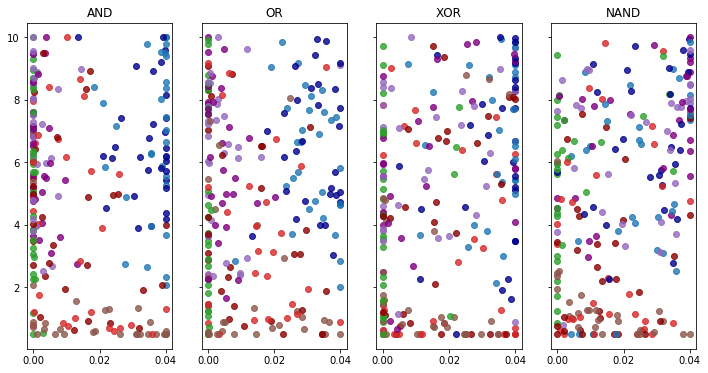

In [4]:
seeds = 30
gen = 100
fig, axs = plt.subplots(1, 4, figsize=(12, 6), sharex=True, sharey=True)
axs = axs.flatten()
offset = 0 
encoding = "size"
size = True
stiffness = True
plot_type = "m"
# for color_coding in ['size', 'stiffness']:
for idx, gate in enumerate(["AND", "OR", "XOR", "NAND"]):

    stiffness_by_particle = {}
    size_by_particle = {}
    for particle in range(10):
        stiffness_by_particle[particle] = []
        size_by_particle[particle] = []
    colors = ['tab:blue', 'tab:green', 'tab:blue', 'tab:red', 'tab:purple', 'tab:purple', 'tab:red', 'white', 'tab:brown', 'white']
    colors = ['tab:blue', 'tab:green', 'darkblue', 'tab:red', 'tab:purple', 'purple', 'darkred', 'white', 'tab:brown', 'white']
    []
    for seed in range(seeds):
        checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
        with open(checkpoint_file, 'rb') as f:
            afpo, rng_state, np_rng_state = pickle.load(f)
        best_mat = afpo.return_best()
        for p_idx, particle in enumerate(best_mat.particles):
            stiffness_by_particle[p_idx].append(particle.stiffness)
            size_by_particle[p_idx].append(particle.expansion)

            # color = cmap(p_idx / 10)  # Generate a color from the colormap
            color = colors[p_idx]
            if color == 'white': continue
            axs[idx].errorbar(particle.expansion, particle.stiffness,fmt='o', color=color,
                        ecolor=color, capsize=4, markersize=6,  alpha=0.8)
    
    # std_size_by_particle = [np.std(x) for x in size_by_particle.values()]
    # std_stiffness_by_particle = [np.std(x) for x in stiffness_by_particle.values()]

    # mean_size_by_particle = [sum(x)/len(x) for x in size_by_particle.values()]
    # mean_stiffness_by_particle = [sum(x)/len(x) for x in stiffness_by_particle.values()]
    # norm = mpl.colors.Normalize(vmin=0, vmax=0.02) if color_coding == "size" else mpl.colors.Normalize(vmin=0, vmax=10)

    # colors = mean_size_by_particle  if color_coding=="size" else mean_stiffness_by_particle   
    # cmap = 'viridis'  if color_coding=="size" else 'plasma'
    # colors = plt.cm.viridis(np.linspace(0, 1, 10))
    # num_points = len(std_size_by_particle)
    # # Create a viridis colormap
    # cmap = cm.get_cmap('tab10', num_points)

    # # Create a figure
    # fig, ax = plt.subplots()

    # for i in range(10):
    #     color = cmap(i / num_points)  # Generate a color from the colormap
    #     color = colors[i]
    #     if color == 'white': continue
    #     axs[idx].errorbar(np.array(np.array(mean_size_by_particle)+1)[i], mean_stiffness_by_particle[i], xerr=std_size_by_particle[i], yerr=std_stiffness_by_particle[i], fmt='o', color=color,
    #                 ecolor=color, capsize=4, markersize=6, label=f'Point {i+1}' if i == 0 else "", alpha=0.8)
    # axs[idx].scatter(np.array(mean_size_by_particle)+1, mean_stiffness_by_particle, label=gate, c=range(10), cmap='viridis', s=100)

    # axs[idx].errorbar(np.array(mean_size_by_particle)+1, mean_stiffness_by_particle, xerr=std_size_by_particle, yerr=std_stiffness_by_particle, fmt='.', ecolor='k', capsize=1, alpha = 0.4, label='Data with Error Bars')

    # axs[idx].scatter(np.array(mean_size_by_particle)+1, mean_stiffness_by_particle, label=gate, c=range(10), cmap='viridis', s=100)
    axs[idx].set_title(f'{gate}')
    # axs[idx].set_xlim([0.99,1.04])
    # axs[idx].set_ylim([0.0,10])

offset+=4


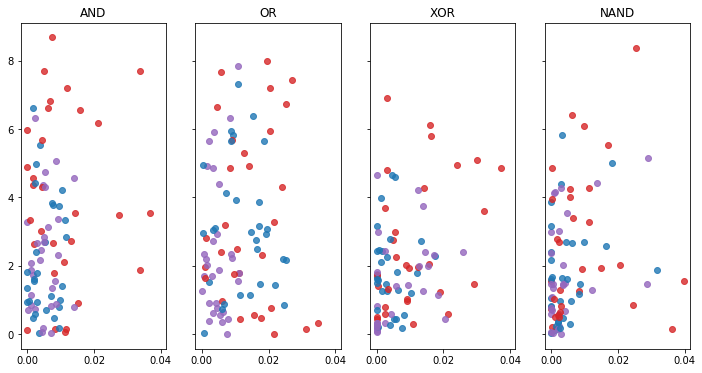

In [5]:
seeds = 30
gen = 100
fig, axs = plt.subplots(1, 4, figsize=(12, 6), sharex=True, sharey=True)
axs = axs.flatten()
offset = 0 
encoding = "stiffness"
size = True
stiffness = True
plot_type = "m"
# for color_coding in ['size', 'stiffness']:
for idx, gate in enumerate(["AND", "OR", "XOR", "NAND"]):

    stiffness_by_particle = {}
    size_by_particle = {}
    for particle in range(10):
        stiffness_by_particle[particle] = []
        size_by_particle[particle] = []
    colors = ['tab:blue', 'tab:green', 'tab:blue', 'tab:red', 'tab:purple', 'tab:purple', 'tab:red', 'white', 'tab:brown', 'white']
    colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    pairs = [[0,2], [3,6], [4,5]]
    for seed in range(seeds):
        checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
        with open(checkpoint_file, 'rb') as f:
            afpo, rng_state, np_rng_state = pickle.load(f)
        best_mat = afpo.return_best()
        
        axs[idx].errorbar(np.abs(best_mat.particles[0].expansion - best_mat.particles[2].expansion), np.abs(best_mat.particles[0].stiffness - best_mat.particles[2].stiffness),fmt='o', color='tab:blue',
                    ecolor=color, capsize=4, markersize=6,  alpha=0.8)
        axs[idx].errorbar(np.abs(best_mat.particles[3].expansion - best_mat.particles[6].expansion), np.abs(best_mat.particles[3].stiffness - best_mat.particles[6].stiffness),fmt='o', color='tab:red',
                    ecolor=color, capsize=4, markersize=6,  alpha=0.8)
        axs[idx].errorbar(np.abs(best_mat.particles[4].expansion - best_mat.particles[5].expansion), np.abs(best_mat.particles[4].stiffness - best_mat.particles[5].stiffness),fmt='o', color='tab:purple',
                    ecolor=color, capsize=4, markersize=6,  alpha=0.8)
        # for p_idx, particle in enumerate(best_mat.particles):
        #     if p_idx == 0: 
        #     stiffness_by_particle[p_idx].append(particle.stiffness)
        #     size_by_particle[p_idx].append(particle.expansion)

        #     color = colors[p_idx]
        #     if color == 'white': continue
        #     axs[idx].errorbar(particle.expansion, particle.stiffness,fmt='o', color=color,
        #                 ecolor=color, capsize=4, markersize=6,  alpha=0.8)
    axs[idx].set_title(f'{gate}')
offset+=4

3.5975449693067154 0 True True size
4.6484263981973415 1 True True size
4.825312428620888 2 True True size
1.615336621729803 3 True True size
1.845930137164984 4 True True size
4.510646238661261 5 True True size
5.021615469541199 6 True True size
5.237052406692028 7 True True size
7.404983059267354 8 True True size
7.632654964374346 9 True True size
3.182644551121317 10 True True size
4.803952341034732 11 True True size
5.088371792335657 12 True True size
2.955914330193596 13 True True size
4.38718086441266 14 True True size
7.380073277434438 15 True True size
5.661910551136393 16 True True size
5.655985022631742 17 True True size
7.23907518044348 18 True True size
5.238702681084942 19 True True size
7.02033471663718 20 True True size
5.705631791200102 21 True True size
6.68730994455122 22 True True size
7.242074343442348 23 True True size
6.521058238007673 24 True True size
6.124461246905054 25 True True size
5.476126775741693 26 True True size
5.390467087769017 27 True True size
6.98

5.972378960285649 0 True True stiffness
1.9803763147749622 1 True True stiffness
6.267352415195384 2 True True stiffness
6.220075130866879 3 True True stiffness
2.15891317544166 4 True True stiffness
7.642622228201448 5 True True stiffness
8.588189186705906 6 True True stiffness
6.53909746862207 7 True True stiffness
8.168780971338588 8 True True stiffness
6.441866789722338 9 True True stiffness
2.995118957166685 10 True True stiffness
5.789303582834912 11 True True stiffness
7.686466974623261 12 True True stiffness
7.16829256826917 13 True True stiffness
6.5435093853862885 14 True True stiffness
4.314213973986536 15 True True stiffness
6.912021889881266 16 True True stiffness
2.0725701921387865 17 True True stiffness
8.015961533227703 18 True True stiffness
7.28432469743819 19 True True stiffness
8.244547918253952 20 True True stiffness
2.3598400857748616 21 True True stiffness
6.764714094833276 22 True True stiffness
6.342126027865123 23 True True stiffness
2.701323139011137 24 True 

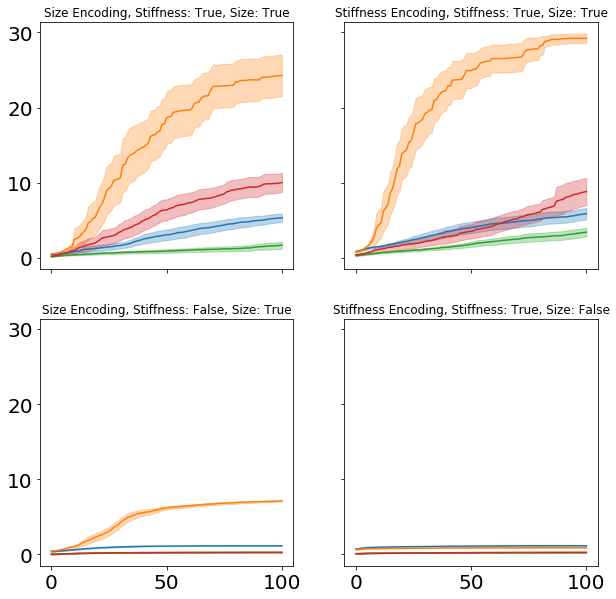

In [6]:
seeds = 30
gen = 100
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axs = axs.flatten()

size_stiffness_options = {1:['size', True, True], 2:['stiffness', True, True], 3:['size', False, True], 4:['stiffness', True, False]}
colors = ['teal', 'indigo', 'yellow', 'navy']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for e_idx, options in enumerate(size_stiffness_options.values()): 
    encoding = options[0]
    stiffness = options[1]
    size = options[2]
    for idx, gate in enumerate(["AND", "OR", "XOR", "NAND"]):
        means = np.zeros((30, 101))
        curr_color = colors[idx]
        for seed in range(seeds):
            checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
            with open(checkpoint_file, 'rb') as f:
                afpo, rng_state, np_rng_state = pickle.load(f)
            best_mat = afpo.return_best()

            # Store fitness values for each seed
            if gate == 'AND':
                print(np.max(afpo.fitness_data[:,:,0]), seed, size, stiffness, encoding)
            means[seed] = np.max(afpo.fitness_data[:,:,0], axis=1)
        
        # Calculate mean and standard error of the mean (SEM) across seeds
        mean_values = np.mean(means, axis=0)
        sem_values = np.std(means, axis=0) / np.sqrt(seeds)

        # Calculate 95% confidence intervals (CI = 1.96 * SEM for a normal distribution)
        lower_bound = mean_values - 1.96 * sem_values
        upper_bound = mean_values + 1.96 * sem_values

        # Plot the mean line
        axs[e_idx].plot(mean_values, color=curr_color, label=gate)
        axs[e_idx].tick_params(axis='x', labelsize=20)  # Adjust the size of the x-axis ticks
        axs[e_idx].tick_params(axis='y', labelsize=20)  # Adjust the size of the x-axis ticks



        # Fill the confidence interval
        axs[e_idx].fill_between(range(len(mean_values)), lower_bound, upper_bound, color=curr_color, alpha=0.3)

        axs[e_idx].set_title(f'{encoding.capitalize()} Encoding, Stiffness: {stiffness}, Size: {size}')
        # axs[e_idx].grid(True)

# plt.legend()
plt.show()


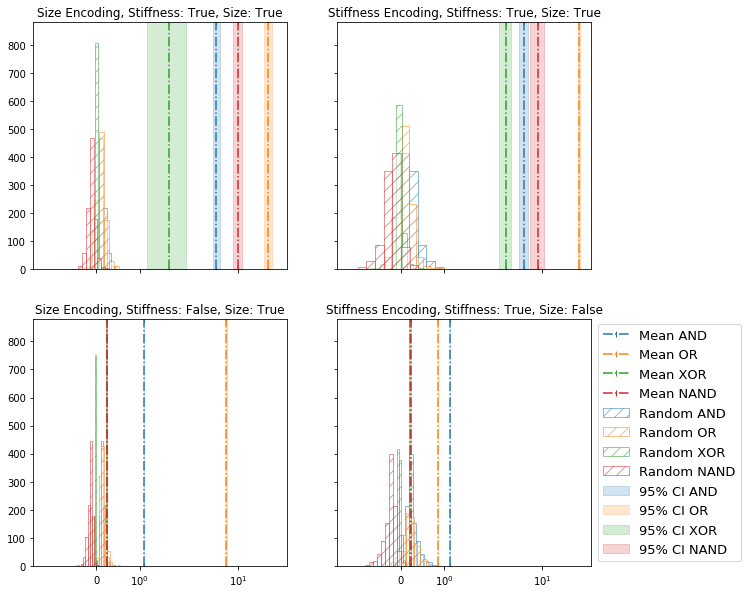

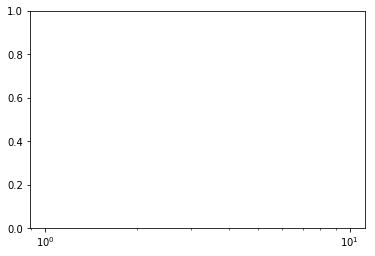

In [7]:
seeds = 30
gen = 100
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axs = axs.flatten()

size_stiffness_options = {1:['size', True, True], 2:['stiffness', True, True], 3:['size', False, True], 4:['stiffness', True, False]}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for e_idx, options in enumerate(size_stiffness_options.values()): 
    encoding = options[0]
    stiffness = options[1]
    size = options[2]
    for idx, gate in enumerate(["AND", "OR", "XOR", "NAND"]):
        means = np.zeros((30, 101))
        curr_color = colors[idx]
        for seed in range(seeds):
            checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
            with open(checkpoint_file, 'rb') as f:
                afpo, rng_state, np_rng_state = pickle.load(f)
            best_mat = afpo.return_best()
            means[seed] = np.max(afpo.fitness_data[:,:,0], axis=1)
        
        # Calculate mean and standard error of the mean (SEM) across seeds
        mean_values = np.mean(means, axis=0)
        sem_values = np.std(means, axis=0) / np.sqrt(seeds)
        mean_values=mean_values[-1]
        sem_values=sem_values[-1]
        x_value = 0
        
        # Calculate 95% confidence intervals (CI = 1.96 * SEM for a normal distribution)
        lower_bound = mean_values - 1.96 * sem_values
        upper_bound = mean_values + 1.96 * sem_values
        ran_df = pd.read_csv(f"gate_{gate}_stiffness_{stiffness}_size_{size}_encoding_{encoding}.csv")
        # Plot the mean line
        axs[e_idx].hist(ran_df['fitness'],alpha=0.5, bins=10,hatch='//',color='white', edgecolor=colors[idx], label=f'Random {gate}')

        axs[e_idx].fill_betweenx([0,900], lower_bound, upper_bound, color=curr_color, alpha=0.2,label=f'95% CI {gate}')

        axs[e_idx].axvline(mean_values,0, color=curr_color, marker='|', linestyle='dashdot',label=f'Mean {gate}')
 
        axs[e_idx].set_title(f'{encoding.capitalize()} Encoding, Stiffness: {stiffness}, Size: {size}')
        # axs[e_idx].grid(True)
        axs[e_idx].set_xscale('symlog')
        axs[e_idx].set_ylim([0,880])


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
plt.show()
plt.xscale('log')

In [3]:
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pickle
import os 
import sys
import numpy as np 
from matplotlib.colors import ListedColormap, BoundaryNorm
sys.path.append(os.path.dirname(os.path.abspath('')))
from afpo import AFPO
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd 

In [4]:
seeds = 30
gen = 100

size_stiffness_options = {1:['size', True, True], 2:['stiffness', True, True], 3:['size', False, True], 4:['stiffness', True, False]}
seed_fitness_map = {}
for e_idx, options in enumerate(size_stiffness_options.values()): 
    encoding = options[0]
    stiffness = options[1]
    size = options[2]
    for idx, gate in enumerate(["AND", "OR", "XOR", "NAND"]):
        means = np.zeros((30, 101))
        for seed in range(seeds):
            checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
            with open(checkpoint_file, 'rb') as f:
                afpo, rng_state, np_rng_state = pickle.load(f)
            best_mat = afpo.return_best()
            seed_fitness_map[seed] = (best_mat.fitness, best_mat.id,seed, best_mat)
        print(max(seed_fitness_map.values()),gate)
        afpo.plot_best(max(seed_fitness_map.values())[-1], "11")


(7.632654964374346, 9365, 9, <material.Material object at 0x7f7bed810550>) AND
[6.87801959831309, 0.0, 7.954900940462473, 0.0, 0.0, 0.0, 3.4313379176868164, 8.000000000000007, 8.000000000000007, 8.000000000000007]
6.87801959831309
0.0
7.954900940462473
0.0
0.0
0.0
3.4313379176868164
8.000000000000007
8.000000000000007
8.000000000000007
(31.609292705251622, 9439, 17, <material.Material object at 0x7f7bedb4a2e8>) OR
[6.675820563064416, 0.0, 6.249468359665533, 6.045347420776981, 0.0, 1.1100715020195384, 2.177153029020751, 8.000000000000007, 4.281496898460446, 8.000000000000007]
6.675820563064416
0.0
6.249468359665533
6.045347420776981
0.0
1.1100715020195384
2.177153029020751
8.000000000000007
4.281496898460446
8.000000000000007
(4.935006672976411, 10079, 14, <material.Material object at 0x7f7bed7018d0>) XOR
[7.16973550568385, 0.0, 7.858975760560538, 0.0, 0.8983743729416016, 0.0, 3.059210345190566, 8.000000000000007, 0.22132662014291427, 8.000000000000007]
7.16973550568385
0.0
7.8589757605

In [9]:
print(seed_fitness_map)

{0: (0.2443582272553161, 10177, 0, <material.Material object at 0x7f0bb92044e0>), 1: (0.24667480931652083, 10194, 1, <material.Material object at 0x7f0bb93c6860>), 2: (0.24613991578493835, 10133, 2, <material.Material object at 0x7f0bb91d48d0>), 3: (0.24559016526402164, 10178, 3, <material.Material object at 0x7f0bb9322eb8>), 4: (0.2467193762930964, 9779, 4, <material.Material object at 0x7f0bb92cd048>), 5: (0.2465177064910129, 9998, 5, <material.Material object at 0x7f0bb9350c18>), 6: (0.2447760384103605, 10139, 6, <material.Material object at 0x7f0bb91b9668>), 7: (0.24641475216597852, 10035, 7, <material.Material object at 0x7f0bb9c8ba20>), 8: (0.24247996735711283, 10040, 8, <material.Material object at 0x7f0bb91ba128>), 9: (0.24557027370642906, 10021, 9, <material.Material object at 0x7f0bb9af1668>), 10: (0.2464243826149911, 10020, 10, <material.Material object at 0x7f0bb91baf60>), 11: (0.24638877744378593, 10042, 11, <material.Material object at 0x7f0bb93c4e80>), 12: (0.24600821666